# Dataset and Preprocessing

1)
The first dataset will show detailed information about gun violence incidents in the U.S. between January 2013 and March 2018. It includes information like the exact location of the incident and the amount of people who were injured or killed. The average number of fatalities in these incidents is 0.25 while the average number of people injured is 0.49.
This dataset provides an opportunity to analyze the spread of gun related incidents across the United States. This dataset was acquired from kaggle.com in the form of a CSV file.

2) 
The second dataset provides poverty estimates for various regions within the United States. The data includes information on poverty rates, population, median household income, and other relevant socio-economic factors. The comprehensive overview of poverty levels across different states which this dataset provides can aid us in analyzing the correlation between poverty and gun violence. The average poverty rate ("Percent in Poverty") is 13.9% between 2011 and 2018, this dataset was also sourced from kaggle.com as a CSV file.

3)
Another dataset is about the amount of intentional homicides per 100,000 people in different countries, it ranges from 1960 - 2021, but in the earlier years there is a lot of missing data.

4) 
The last dataset is about School shootings per state of America 2009 - 2018. This dataset was acquired from Kaggle.com. It provides data about the amount of college students from elementary, middle and high school that got killed, injured and victimized. The dataset has data from 2009 until 2018 for every state and represents what for races the students are. Ev




**Why Guns should be banned in America**

To explain the perspective that guns should be banned in America, we have multiple arguments and visualizations to show why gun violence should be illegal in the whole of America and why the government should take action. 

The first visualization supports our argument that having less restrictions and more freedom on rights to own and use a gun indeed leads to more gun violence in states where thus gun usage is more allowed. This will be represented with a line-dot chart.

Second of all, America is known for mass school shootings. Kids and college students in multiple states Our second visualization is a stacked bar chart that contains the amount killed, injured, and other victims of gun violence. This will be represented with a stacked bar chart, where for every state the amount of ‘killed, injured and victims’ will be represented.

The homicide rate in the USA is, thanks to the right to bear arms, a lot higher than similar countries with stricter gun laws, such as the Netherlands, Germany, France, and Spain. The visualization is a bar chart where the countries’ murder rate is visualized.

**It's not as simple as taking away the guns**

We are going to explore one argument against the notion that the right to bear arms are the main cause for gun related violence
If you just take the guns away without eradicating the root cause of all the gun violence people will find other ways to kill each other. WPeople without jobs who can't provide for themselves are driven to crime and in turn,  gun violence


From the graphs we can see that in states with higher rates of poe need to fight poverty and other socio-economic factors that might encourage
People without jobs who can't provide for themselves are driven to crime and in turn,  gun violence
From the graphs we can see that in states with higher rates of poverty, the amount of gun related incidents is higher than in more wealthy states.


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

df = pd.read_csv('school_shootings.csv')

df.columns = df.columns.str.strip()

# Remove unnecessary columns
columns_to_drop = ['LONCOD', 'LATCOD', 'CDCODE', 'year', 'school', 'city', 'address', 'urbanrural', 'race', 'date', 'type', 'NCESSCH', 'time']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Rename columns for better readability
df.rename(columns={'killed': 'Killed', 'injured': 'Injured', 'victims': 'Victims'}, inplace=True)

# Group by state and sum up the killed, injured, and victims
df_statewise = df.groupby('state')[['Killed', 'Injured', 'Victims']].sum().reset_index()

# Display the processed dataframe
df_statewise.head()

# Create the box plot for number of Killed, Injured, and Victims by State
fig = px.bar(df_statewise.melt(id_vars='state', value_vars=['Killed', 'Injured', 'Victims']),
             x='state', y='value', color='variable', 
             labels={'variable': '', 'value': 'Number'},
             title='Number of Killed, Injured, and Victims by State')

# Update layout for better visualization
fig.update_layout(xaxis_tickangle=-90)

fig.show()

                    Country  Year     VALUE
0  United States of America  2019  3.151774
1                    Europe  2019  0.344465
2             North America  2019  1.285117
3  United States of America  2020  4.054271
4                    Europe  2020  0.275268
5             North America  2020  2.638050
6  United States of America  2021  5.528964
7                    Europe  2021  0.258776
8             North America  2021  3.661326


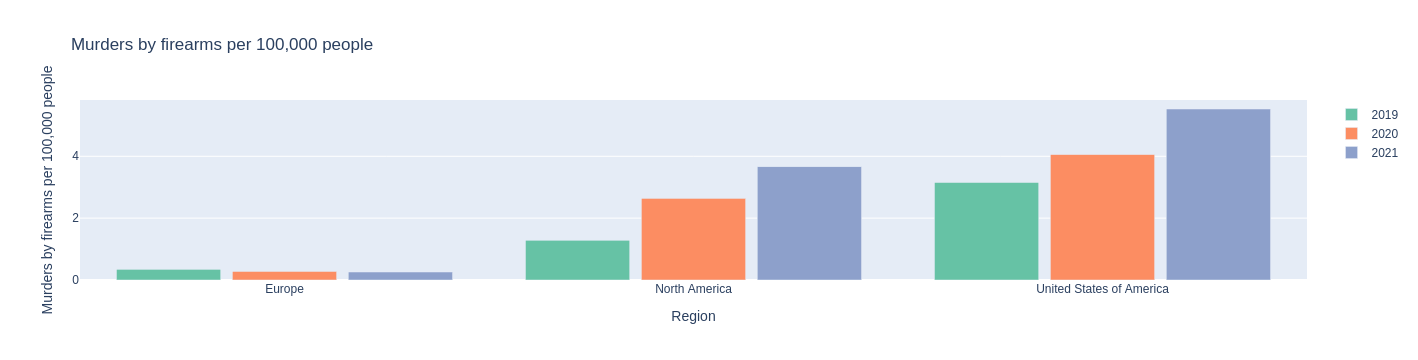

In [56]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode

df = pd.read_csv('Murder_rate_test.csv')

df = df.filter(['Country', 'Region', 'Subregion', 'Year','VALUE'])

europe_df = df[df['Region'] == 'Europe']

europe_2019 = europe_df[europe_df['Year'] == 2019]['VALUE'].mean()
europe_2020 = europe_df[europe_df['Year'] == 2020]['VALUE'].mean()
europe_2021 = europe_df[europe_df['Year'] == 2021]['VALUE'].mean()

north_america_df = df[df['Subregion'] == 'Northern America']

north_america_2019 = north_america_df[north_america_df['Year'] == 2019]['VALUE'].mean()
north_america_2020 = north_america_df[north_america_df['Year'] == 2020]['VALUE'].mean()
north_america_2021 = north_america_df[north_america_df['Year'] == 2021]['VALUE'].mean()



countries_to_keep = ["United States of America"]
df = df[df['Country'].isin(countries_to_keep)]

df = df.filter(['Country', 'Year', 'VALUE'])

d_europe = {'Country': ["Europe", "Europe", "Europe"], 'Year': [2019, 2020, 2021], 'VALUE': [europe_2019, europe_2020, europe_2021]}
d_north_america = {'Country': ["North America", "North America", "North America"], 'Year': [2019, 2020, 2021], 'VALUE': [north_america_2019, north_america_2020, north_america_2021]}

df_europe = pd.DataFrame(data=d_europe)
df_north_america = pd.DataFrame(data=d_north_america)

df = pd.concat([df, df_europe, df_north_america])
df = df.sort_values(by='Year', ascending=True)
df = df.reset_index(drop=True)

df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]

print(df)

# Create a figure
fig = go.Figure()
values = [df_2019['VALUE'], df_2020['VALUE'], df_2021['VALUE']]
titles = ['2019', '2020', '2021']
colors = ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)']

for i in range(3):
    fig.add_trace(go.Bar(x=df['Country'], 
                  y = values[i], 
                  name=f"{titles[i]}", 
                  marker_color=colors[i]))

fig.update_layout(
    title='Murders by firearms per 100,000 people',
    xaxis=dict(
        title='Region',
        type='category',
        categoryorder='category ascending'
    ),
    yaxis=dict(
        title='Murders by firearms per 100,000 people',
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    height=400
)

# Show the figure
fig.show()

In [2]:
import pandas as pd
import plotly.express as px

# Load the poverty dataset
df_poverty = pd.read_csv('poverty.csv')

# Assuming df_poverty has columns 'Name' and 'Percent in Poverty'
# Create a mapping from full state names to abbreviations
us_state_to_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Convert state names to abbreviations
df_poverty['Name'] = df_poverty['Name'].map(us_state_to_abbrev)

# Create a choropleth map for poverty rates by state
fig = px.choropleth(df_poverty,
                    locations='Name',
                    locationmode='USA-states',
                    color='Percent in Poverty',
                    scope='usa',
                    color_continuous_scale='Greens',
                    title='Poverty Rates by State',
                    labels={'Percent in Poverty': 'Poverty Rate (%)'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Unique state values in df_guns_aggregated_2018:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Unmapped States:
Empty DataFrame
Columns: [state, n_killed, state_abbrev]
Index: []
Unique state abbreviations in df_statepop:
[nan 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'T

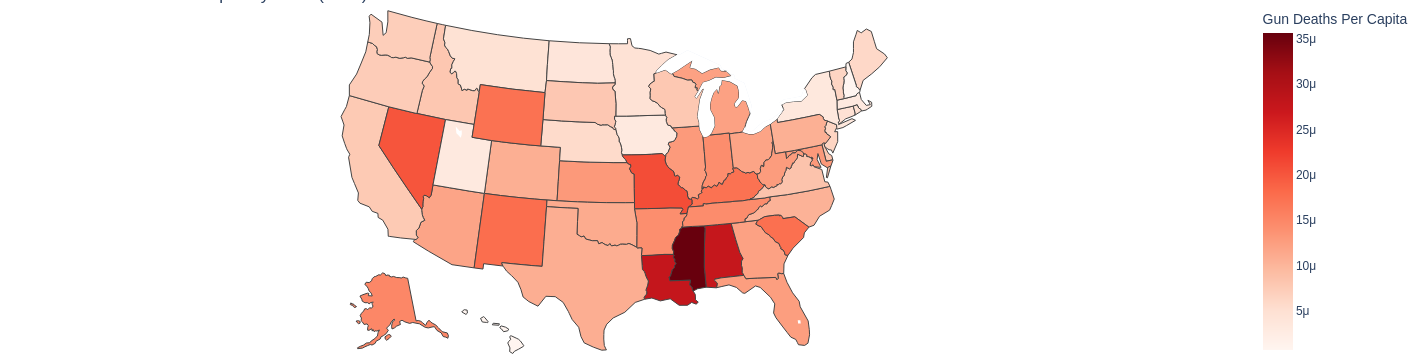

In [16]:
import pandas as pd
import plotly.express as px

# Load the datasets
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv', dtype={'n_killed': int, 'city_or_county': str})
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Convert 'date' column to datetime and filter for 2018
df_guns['date'] = pd.to_datetime(df_guns['date'])
df_guns_2018 = df_guns[df_guns['date'].dt.year == 2018]

# Aggregate the gun violence data by state for 2018
df_guns_aggregated_2018 = df_guns_2018.groupby('state').agg({
    'n_killed': 'sum'
}).reset_index()

# Print unique state values in df_guns_aggregated_2018
print("Unique state values in df_guns_aggregated_2018:")
print(df_guns_aggregated_2018['state'].unique())

# Create a mapping from full state names to abbreviations, including D.C.
us_state_to_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Convert state names to abbreviations for df_guns_aggregated_2018
df_guns_aggregated_2018['state_abbrev'] = df_guns_aggregated_2018['state'].map(us_state_to_abbrev)

# Identify states that did not get mapped
unmapped_states = df_guns_aggregated_2018[df_guns_aggregated_2018['state_abbrev'].isna()]

print("Unmapped States:")
print(unmapped_states)

# Now only keep the rows with valid state abbreviations for merging
df_guns_aggregated_2018 = df_guns_aggregated_2018.dropna(subset=['state_abbrev'])

# Mapping of numerical state codes to state abbreviations
state_code_to_abbrev = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE',
    11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN',
    19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA',
    26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
    33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH',
    40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN',
    48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI',
    56: 'WY', 72: 'PR'  # Puerto Rico
}

# Ensure the state codes in df_statepop are properly formatted
df_statepop['state_abbrev'] = df_statepop['STATE'].map(state_code_to_abbrev)

# Print unique state abbreviations in df_statepop
print("Unique state abbreviations in df_statepop:")
print(df_statepop['state_abbrev'].unique())

# Merge with the state population data
df_merged = pd.merge(df_guns_aggregated_2018, df_statepop[['state_abbrev', 'POPESTIMATE2018']], on='state_abbrev', how='inner')

# Calculate gun deaths per capita using the 2018 population estimates
df_merged['gun_deaths_per_capita'] = df_merged['n_killed'] / df_merged['POPESTIMATE2018']

# Output the first few rows of the merged dataframe
print("\nMerged DataFrame:")
print(df_merged.head())

# Create a choropleth map for the gun deaths per capita by state
fig = px.choropleth(
    df_merged,
    locations='state_abbrev',
    locationmode='USA-states',
    color='gun_deaths_per_capita',
    scope='usa',
    color_continuous_scale='Reds',
    title='Gun Deaths Per Capita by State (2018)',
    labels={'gun_deaths_per_capita': 'Gun Deaths Per Capita'}
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [17]:
import pandas as pd
import plotly.express as px

# Load the datasets
df_poverty = pd.read_csv('poverty.csv')
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Filter the poverty dataset to include only 2018 data
df_poverty_2018 = df_poverty[df_poverty['Year'] == 2018]

# Filter the gun violence dataset to include only 2018 data
df_guns['date'] = pd.to_datetime(df_guns['date'])
df_guns_2018 = df_guns[df_guns['date'].dt.year == 2018]

# Rename 'Name' column in df_poverty to 'state' for merging
df_poverty_2018.rename(columns={'Name': 'state'}, inplace=True)

# Group by state and aggregate the gun violence data for 2018
df_guns_aggregated_2018 = df_guns_2018.groupby('state').agg({
    'n_killed': 'sum',  # or 'mean' if you prefer
    'n_injured': 'sum'
}).reset_index()

# Merge the aggregated gun violence data with the poverty data for 2018
df_merged_2018 = pd.merge(df_poverty_2018, df_guns_aggregated_2018, on='state')

# Check and ensure state names match for the state population data
df_statepop['state'] = df_statepop['NAME']  # Assuming 'NAME' is the column with state names in df_statepop

# Merge with the state population data
df_merged_2018 = pd.merge(df_merged_2018, df_statepop[['state', 'POPESTIMATE2018']], on='state')

# Calculate gun deaths per capita using the 2020 census population
df_merged_2018['gun_deaths_per_capita'] = df_merged_2018['n_killed'] / df_merged_2018['POPESTIMATE2018']

# Create a scatter plot with a trend line
fig = px.scatter(df_merged_2018,
                 x='Percent in Poverty',
                 y='gun_deaths_per_capita',
                 hover_data=['state'],
                 title='Correlation between Poverty Rate and Gun Deaths Per Capita in US States (2018)',
                 labels={
                     'Percent in Poverty': 'Poverty Rate (%)',
                     'gun_deaths_per_capita': 'Gun Deaths Per Capita'
                 },
                 trendline='ols')  # Add a trend line using ordinary least squares (OLS) regression

# Update the trend line color to red
fig.update_traces(line=dict(color='red'), selector=dict(type='scatter', mode='lines'))

# Show the plot
fig.show()


/tmp/ipykernel_14703/2570877035.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipykernel_14703/1987570914.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



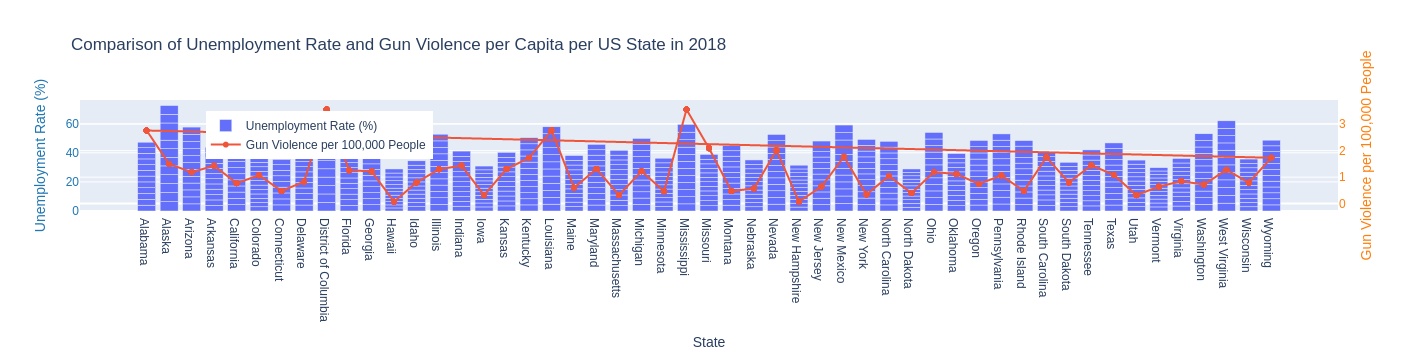

In [18]:
import pandas as pd
import plotly.graph_objects as go

# Load the datasets
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_unemployment = pd.read_csv('Unemployment in America Per US State.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Convert date column to datetime
df_guns['date'] = pd.to_datetime(df_guns['date'])

# Filter data for 2018
df_guns_2018 = df_guns[df_guns['date'].dt.year == 2018]

# Aggregate gun violence data by state
df_guns_agg = df_guns_2018.groupby('state')['n_killed'].sum().reset_index()

# Filter unemployment data for 2018
df_unemployment_2018 = df_unemployment[df_unemployment['Year'] == 2018]

# Select relevant columns from population dataset
df_statepop_2018 = df_statepop[['STATE', 'POPESTIMATE2018']]

# Replace state codes with state names in the population dataset
state_codes = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut',
    10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho',
    17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
    24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri',
    30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon',
    42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee',
    48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia',
    55: 'Wisconsin', 56: 'Wyoming'
}
df_statepop_2018['state'] = df_statepop_2018['STATE'].map(state_codes)

# Merge the datasets on the state
df_merged = pd.merge(df_unemployment_2018, df_guns_agg, left_on='State/Area', right_on='state')
df_merged = pd.merge(df_merged, df_statepop_2018[['state', 'POPESTIMATE2018']], on='state')

# Calculate gun violence per capita
df_merged['n_killed_per_capita'] = df_merged['n_killed'] / df_merged['POPESTIMATE2018'] * 100000  # per 100,000 people

# Create Dual Axis plot
fig = go.Figure()

# Add unemployment data to the plot
fig.add_trace(
    go.Bar(x=df_merged['State/Area'], y=df_merged['Percent (%) of Labor Force Unemployed in State/Area'], name='Unemployment Rate (%)', yaxis='y1')
)

# Add gun violence per capita data to the plot
fig.add_trace(
    go.Scatter(x=df_merged['State/Area'], y=df_merged['n_killed_per_capita'], name='Gun Violence per 100,000 People', yaxis='y2', mode='lines+markers')
)

# Create axis objects
fig.update_layout(
    title='Comparison of Unemployment Rate and Gun Violence per Capita per US State in 2018',
    xaxis=dict(title='State'),
    yaxis=dict(title='Unemployment Rate (%)', titlefont=dict(color='#1f77b4'), tickfont=dict(color='#1f77b4')),
    yaxis2=dict(title='Gun Violence per 100,000 People', titlefont=dict(color='#ff7f0e'), tickfont=dict(color='#ff7f0e'), overlaying='y', side='right'),
    legend=dict(x=0.1, y=0.9),
    barmode='group'
)

fig.show()


After merging with population data:
state         0
n_killed      0
population    0
dtype: int64
After merging with gun law strictness:
state                0
n_killed             0
population           0
deaths_per_capita    0
lawtotal             1
dtype: int64


/tmp/ipykernel_14703/532971617.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



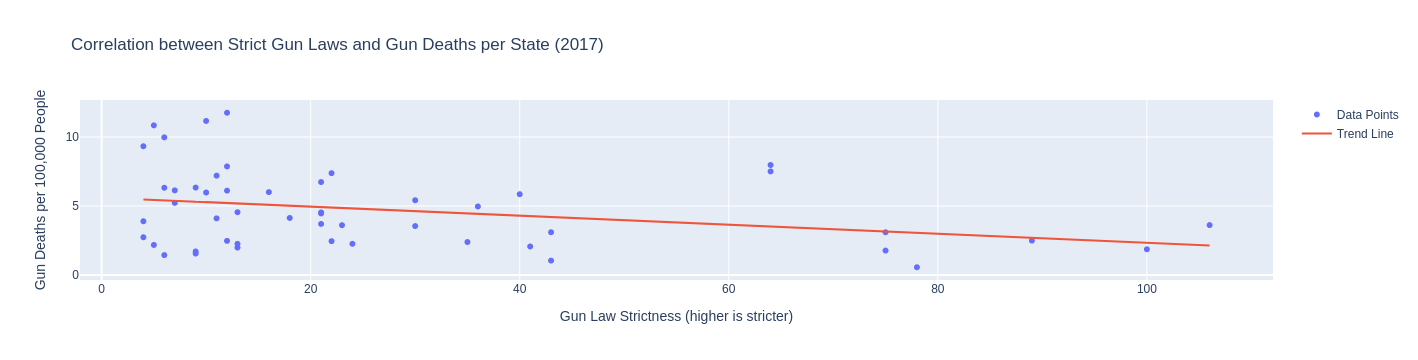

In [19]:
import pandas as pd
import plotly.graph_objects as go
import statsmodels.api as sm

# Load the datasets
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_laws = pd.read_csv('raw_data.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Map FIPS codes to state names
fips_to_state = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
    9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia',
    15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas',
    21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts',
    26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
    31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma',
    41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
    47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
    54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 72: 'Puerto Rico'
}

# Replace FIPS codes with state names in population dataset
df_statepop['state'] = df_statepop['STATE'].astype(int).map(fips_to_state)

# Filter gun deaths to only include 2017 data
df_guns['date'] = pd.to_datetime(df_guns['date'])
df_guns_2017 = df_guns[df_guns['date'].dt.year == 2017]

# Filter necessary columns
df_guns_2017 = df_guns_2017[['state', 'n_killed']]
df_laws_2017 = df_laws[df_laws['year'] == 2017]
df_statepop = df_statepop[['state', 'POPESTIMATE2017']]

# Ensure state columns are strings for merging
df_guns_2017['state'] = df_guns_2017['state'].astype(str)
df_laws_2017['state'] = df_laws_2017['state'].astype(str)
df_statepop['state'] = df_statepop['state'].astype(str)

# Calculate total gun deaths per state
df_gun_deaths_2017 = df_guns_2017.groupby('state').sum().reset_index()

# Rename columns for consistency
df_statepop = df_statepop.rename(columns={'POPESTIMATE2017': 'population'})

# Merge gun deaths with population data
df_merged_2017 = pd.merge(df_gun_deaths_2017, df_statepop, on='state', how='left')

# Check for missing values after merging
print("After merging with population data:")
print(df_merged_2017.isnull().sum())

# Calculate gun deaths per capita
df_merged_2017['deaths_per_capita'] = df_merged_2017['n_killed'] / df_merged_2017['population'] * 100000  # per 100,000 people

# Merge with gun law strictness
df_final_2017 = pd.merge(df_merged_2017, df_laws_2017[['state', 'lawtotal']], on='state', how='left')

# Check for missing values after merging
print("After merging with gun law strictness:")
print(df_final_2017.isnull().sum())

# Remove rows with NaNs if any
df_final_2017.dropna(subset=['lawtotal', 'deaths_per_capita'], inplace=True)

# Fit a regression line
X = df_final_2017['lawtotal']
y = df_final_2017['deaths_per_capita']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
df_final_2017['trend'] = model.predict(X)

# Create scatter plot with trend line
fig = go.Figure()

# Scatter plot
fig.add_trace(go.Scatter(
    x=df_final_2017['lawtotal'],
    y=df_final_2017['deaths_per_capita'],
    mode='markers',
    text=df_final_2017['state'],
    name='Data Points'
))

# Trend line
fig.add_trace(go.Scatter(
    x=df_final_2017['lawtotal'],
    y=df_final_2017['trend'],
    mode='lines',
    name='Trend Line'
))

fig.update_layout(
    title='Correlation between Strict Gun Laws and Gun Deaths per State (2017)',
    xaxis_title='Gun Law Strictness (higher is stricter)',
    yaxis_title='Gun Deaths per 100,000 People',
    showlegend=True
)

fig.show()
